In [ ]:
Detect

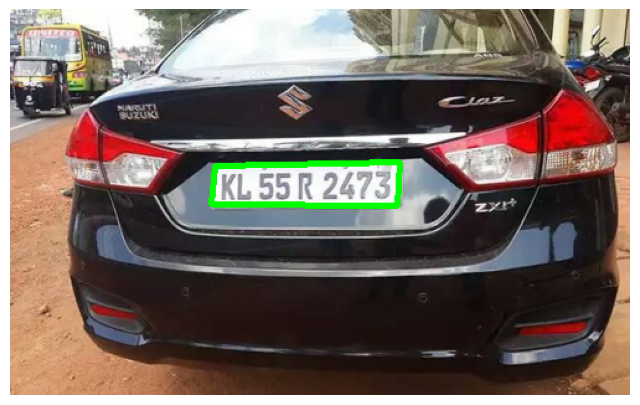

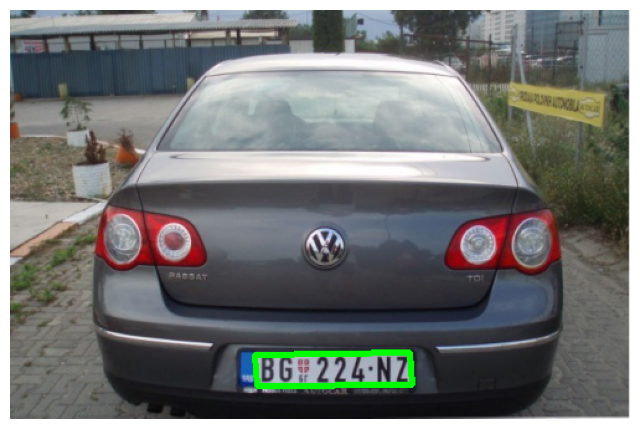

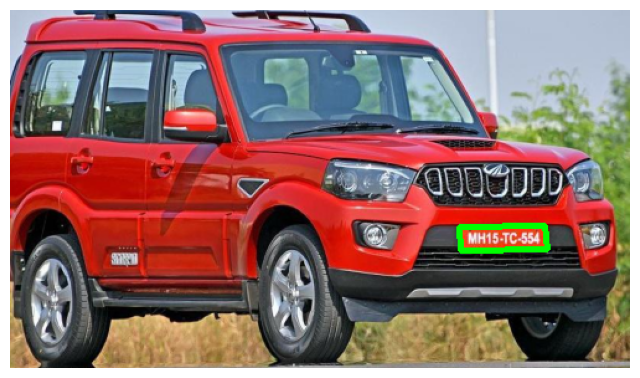

Images that failed to detect properly: []


In [1]:
import os
import cv2
import imutils
import matplotlib.pyplot as plt

# Path to your images folder
image_folder = "dataset"

# List to keep track of images that fail to detect properly
failed_detections = []

# Loop through all images in the folder
for image_name in os.listdir(image_folder):
    try:
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)

        # Resize the image - change width to 500 pixels
        image = imutils.resize(image, width=500)

        # RGB to Gray scale conversion
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Noise removal with iterative bilateral filter
        gray = cv2.bilateralFilter(gray, 11, 17, 17)

        # Find Edges of the grayscale image
        edged = cv2.Canny(gray, 170, 200)

        # Find contours based on Edges
        cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
        NumberPlateCnt = None

        # Loop over contours to find the best possible contour
        for c in cnts:
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)
            if len(approx) == 4:
                NumberPlateCnt = approx
                break

        # Drawing the selected contour on the original image
        if NumberPlateCnt is not None:
            cv2.drawContours(image, [NumberPlateCnt], -1, (0, 255, 0), 3)
        else:
            raise ValueError("Number plate not detected")

        # Convert the image from BGR to RGB for displaying with matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the processed image using matplotlib
        plt.figure(figsize=(8, 6))
        plt.imshow(image_rgb)
        plt.axis('off')  # Hide the axis
        plt.show()

    except Exception as e:
        print(f"Failed to process {image_name}: {str(e)}")
        failed_detections.append(image_name)

# After processing, print the list of failed detections
print("Images that failed to detect properly:", failed_detections)


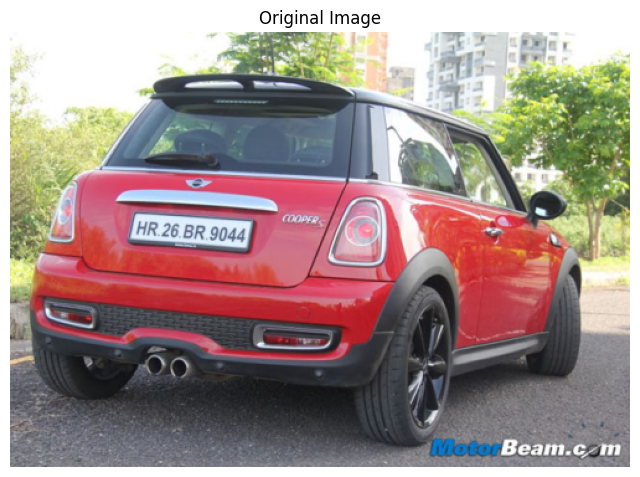

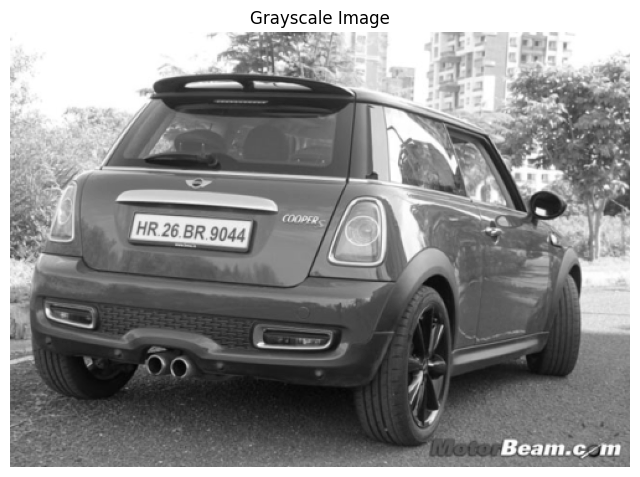

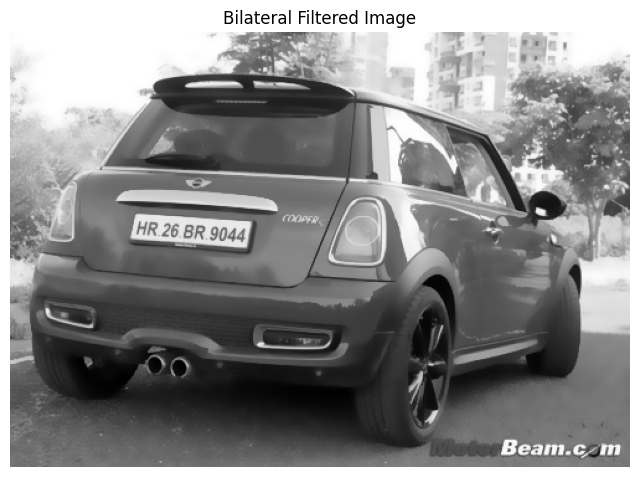

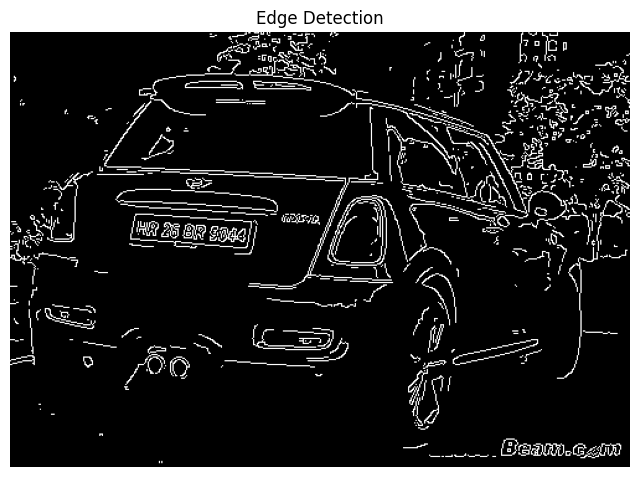

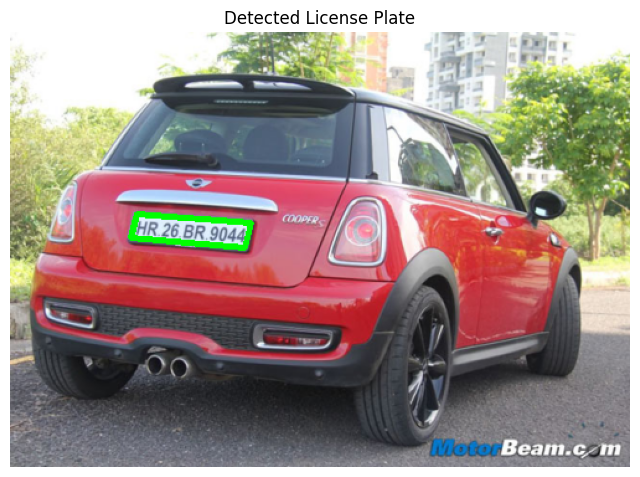

In [2]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

# Function to display images using Matplotlib
def display_image(img, title='Image', cmap_type=None):
    plt.figure(figsize=(8, 6))
    if cmap_type:  # For grayscale images
        plt.imshow(img, cmap=cmap_type)
    else:  # For color images
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Read the image file
image = cv2.imread('2.jpg')

# Resize the image - change width to 500
image = imutils.resize(image, width=500)

# Display the original image
display_image(image, 'Original Image')

# RGB to Gray scale conversion
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image(gray, 'Grayscale Image', cmap_type='gray')

# Noise removal with iterative bilateral filter (removes noise while preserving edges)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
display_image(gray, 'Bilateral Filtered Image', cmap_type='gray')

# Find Edges of the grayscale image
edged = cv2.Canny(gray, 170, 200)
display_image(edged, 'Edge Detection', cmap_type='gray')

# Find contours based on Edges
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]  # Sort contours based on their area
NumberPlateCnt = None  # We currently have no Number plate contour

# Loop over our contours to find the best possible approximate contour of number plate
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:  # Select the contour with 4 corners
        NumberPlateCnt = approx  # This is our approx Number Plate Contour
        break

# Drawing the selected contour on the original image
cv2.drawContours(image, [NumberPlateCnt], -1, (0, 255, 0), 3)
display_image(image, 'Detected License Plate')


In [ ]:
Recognition of text

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\Mathu Pugalendhi Rao\.virtualenvs\license-plate-detection-LJU4rvWQ\Lib\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded

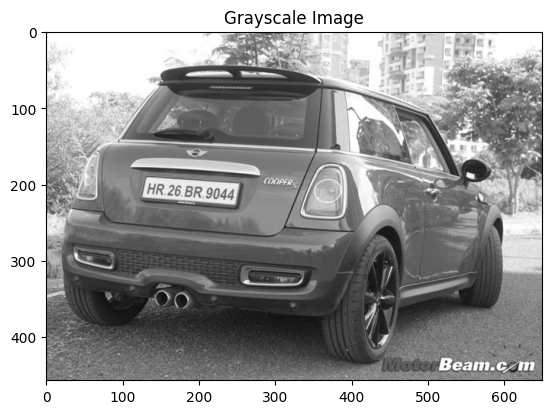

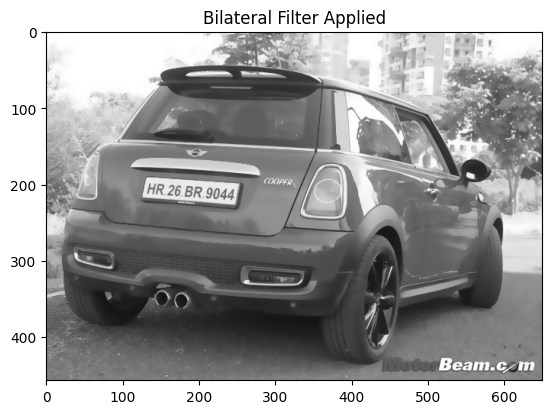

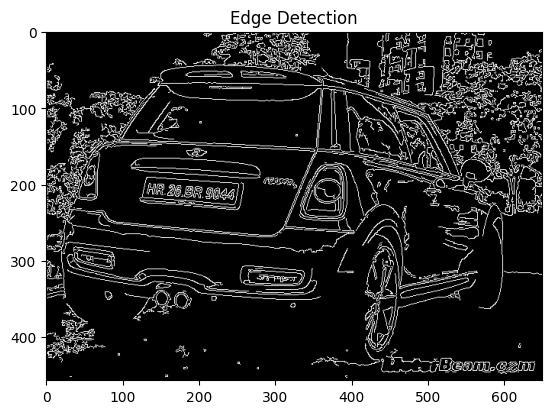

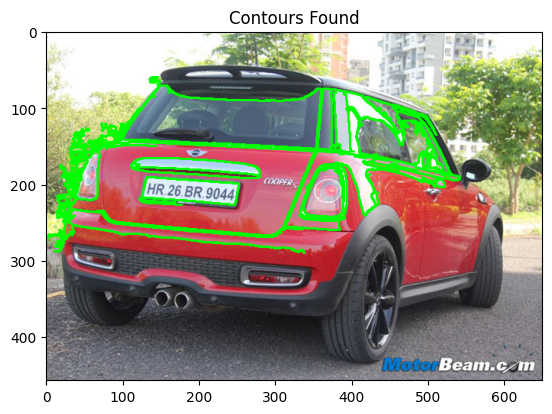

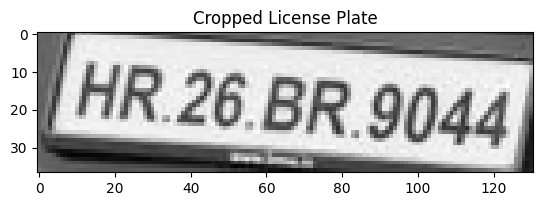

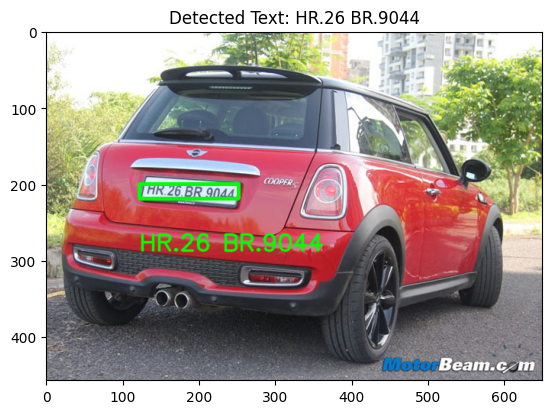

Detected Text: HR.26 BR.9044
Processing complete.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import imutils

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])

# Path to the image
image_path = "2.jpg"  # Change this to your image path

# Load the image
img = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.title("Grayscale Image")
plt.show()

# Bilateral filter
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_GRAY2RGB))
plt.title("Bilateral Filter Applied")
plt.show()

# Edge detection
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(edged, cmap='gray')
plt.title("Edge Detection")
plt.show()

# Find contours
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

# Draw contours
contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title("Contours Found")
plt.show()

# Locate the license plate
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

if location is not None:
    # Create mask and extract license plate
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)

    (x, y) = np.where(mask == 255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]

    # Display cropped image
    plt.imshow(cropped_image, cmap='gray')
    plt.title("Cropped License Plate")
    plt.show()

    # Use EasyOCR to read text from the cropped image
    result = reader.readtext(cropped_image)

    if result:
        text = result[0][-2]

        # Annotate original image with detected text
        font = cv2.FONT_HERSHEY_SIMPLEX
        res = cv2.putText(img, text=text, org=(location[0][0][0], location[1][0][1]+60),
                          fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
        res = cv2.rectangle(img, tuple(location[0][0]), tuple(location[2][0]), (0,255,0), 3)

        # Display the final result
        plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
        plt.title(f"Detected Text: {text}")
        plt.show()

        # Print the detected text
        print(f"Detected Text: {text}")
    else:
        print("No text detected.")
else:
    print("No license plate found.")

print("Processing complete.")

In [ ]:
method 1

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


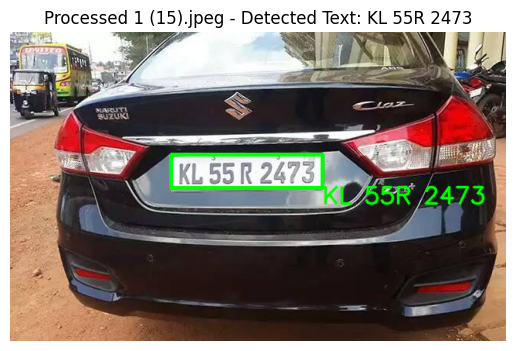

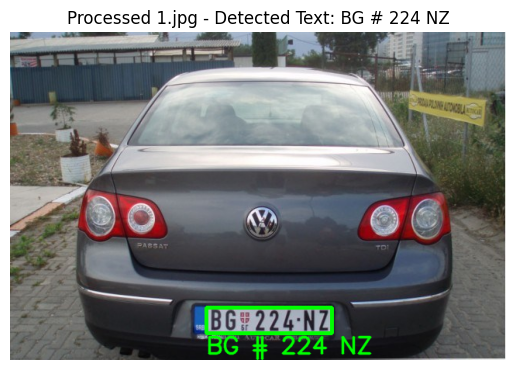

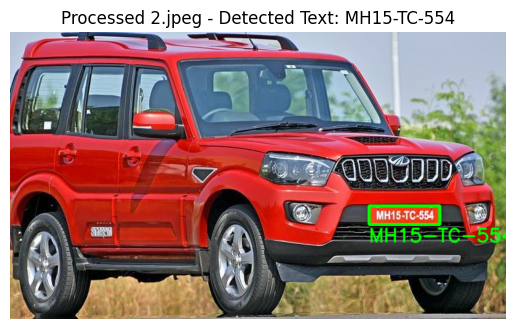

Processing complete.


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import easyocr
import imutils

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])

# Path to the folder containing images
image_folder =  "dataset"

# Loop through all images in the folder
for image_name in os.listdir(image_folder):
    try:
        # Load image
        img_path = os.path.join(image_folder, image_name)
        img = cv2.imread(img_path)

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Bilateral filter and edge detection
        bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
        edged = cv2.Canny(bfilter, 30, 200)

        # Find contours
        keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = imutils.grab_contours(keypoints)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

        # Locate the license plate
        location = None
        for contour in contours:
            approx = cv2.approxPolyDP(contour, 10, True)
            if len(approx) == 4:
                location = approx
                break

        if location is not None:
            # Create mask and extract license plate
            mask = np.zeros(gray.shape, np.uint8)
            new_image = cv2.drawContours(mask, [location], 0, 255, -1)
            new_image = cv2.bitwise_and(img, img, mask=mask)

            (x, y) = np.where(mask == 255)
            (x1, y1) = (np.min(x), np.min(y))
            (x2, y2) = (np.max(x), np.max(y))
            cropped_image = gray[x1:x2+1, y1:y2+1]

            # Use EasyOCR to read text from the cropped image
            result = reader.readtext(cropped_image)

            if result:
                text = result[0][-2]

                # Annotate original image with detected text
                font = cv2.FONT_HERSHEY_SIMPLEX
                res = cv2.putText(img, text=text, org=(location[0][0][0], location[1][0][1]+60),
                                  fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
                res = cv2.rectangle(img, tuple(location[0][0]), tuple(location[2][0]), (0,255,0), 3)

                # Display the annotated image
                plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
                plt.title(f"Processed {image_name} - Detected Text: {text}")
                plt.axis('off')
                plt.show()
            else:
                print(f"No text detected in {image_name}.")
        else:
            print(f"No license plate found in {image_name}.")
    except Exception as e:
        print(f"Error processing {image_name}: {e}")

print("Processing complete.")


In [ ]:
method 2

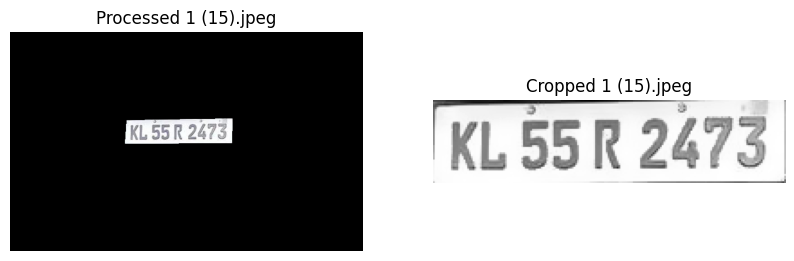

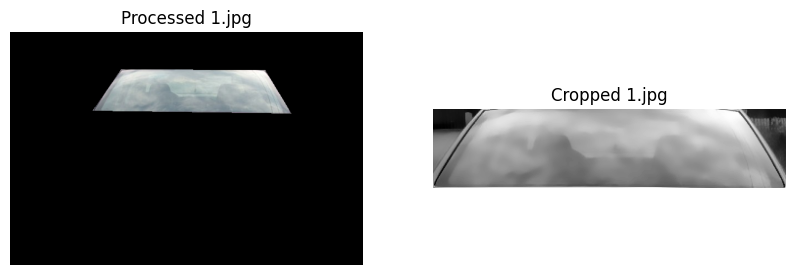

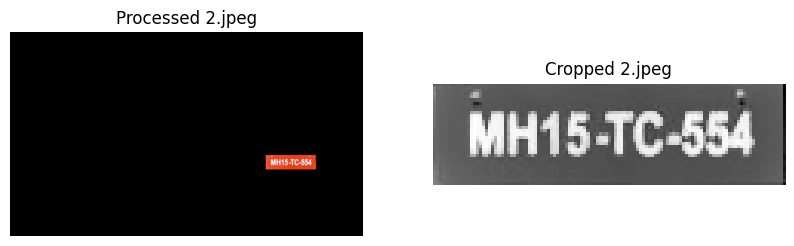

Processing complete.


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import imutils

# Path to the folder containing images
image_folder = "dataset"

# Get a list of all images in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for image_name in image_files:
    img_path = os.path.join(image_folder, image_name)
    try:
        # Load image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply bilateral filter and adaptive threshold
        gray = cv2.bilateralFilter(gray, 11, 17, 17)
        edged = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY, 11, 2)

        # Find contours
        keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = imutils.grab_contours(keypoints)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

        # Locate the license plate
        location = None
        for contour in contours:
            approx = cv2.approxPolyDP(contour, 10, True)
            if len(approx) == 4:
                x, y, w, h = cv2.boundingRect(approx)
                aspect_ratio = w / float(h)
                if 2.0 < aspect_ratio < 5.0:  # Adjust aspect ratio as needed
                    location = approx
                    break

        if location is not None:
            # Create mask and extract license plate
            mask = np.zeros(gray.shape, np.uint8)
            cv2.drawContours(mask, [location], 0, 255, -1)
            new_image = cv2.bitwise_and(img, img, mask=mask)

            (x, y) = np.where(mask == 255)
            (x1, y1) = (np.min(x), np.min(y))
            (x2, y2) = (np.max(x), np.max(y))
            cropped_image = gray[x1:x2+1, y1:y2+1]

            # Display the result
            plt.figure(figsize=(10, 8))

            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
            plt.title(f"Processed {image_name}")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(cropped_image, cmap='gray')
            plt.title(f"Cropped {image_name}")
            plt.axis('off')

            plt.show()
        else:
            print(f"No license plate found in {image_name}.")
    except Exception as e:
        print(f"Error processing {image_name}: {e}")

print("Processing complete.")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


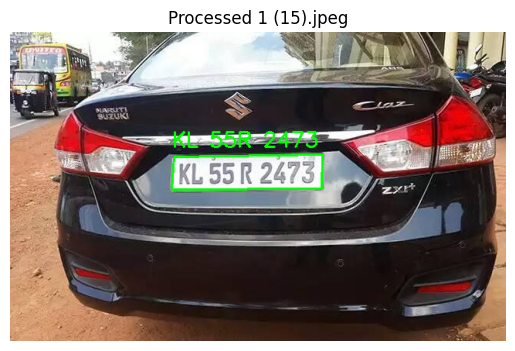

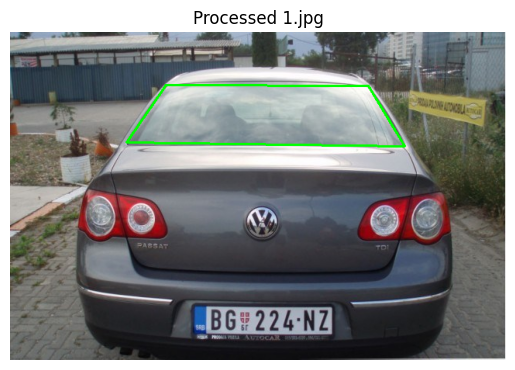

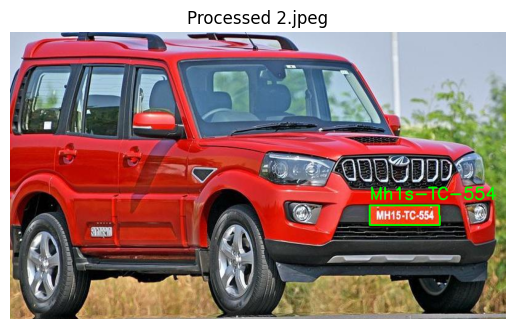

Processing complete.


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import imutils
import easyocr

# Path to the folder containing images
image_folder = "dataset"

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])

# Get a list of all images in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for image_name in image_files:
    img_path = os.path.join(image_folder, image_name)
    try:
        # Load image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply adaptive threshold
        gray = cv2.bilateralFilter(gray, 11, 17, 17)
        edged = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY, 11, 2)

        # Find contours
        keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = imutils.grab_contours(keypoints)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

        # Locate the license plate
        location = None
        for contour in contours:
            approx = cv2.approxPolyDP(contour, 10, True)
            if len(approx) == 4:
                x, y, w, h = cv2.boundingRect(approx)
                aspect_ratio = w / float(h)
                if 2.0 < aspect_ratio < 5.0:  # Adjust aspect ratio as needed
                    location = approx
                    break

        if location is not None:
            # Create mask and extract license plate
            mask = np.zeros(gray.shape, np.uint8)
            cv2.drawContours(mask, [location], 0, 255, -1)
            new_image = cv2.bitwise_and(img, img, mask=mask)

            (x, y) = np.where(mask == 255)
            (x1, y1) = (np.min(x), np.min(y))
            (x2, y2) = (np.max(x), np.max(y))
            cropped_image = gray[x1:x2+1, y1:y2+1]

            # Use EasyOCR to read text from the license plate
            result = reader.readtext(cropped_image)
            plate_text = ""
            for detection in result:
                plate_text += detection[1] + " "

            # Draw rectangle around the license plate and put the text
            img_with_box = img.copy()
            cv2.drawContours(img_with_box, [location], -1, (0, 255, 0), 2)
            x, y, w, h = cv2.boundingRect(location)
            cv2.putText(img_with_box, plate_text.strip(), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Display the result
            plt.imshow(cv2.cvtColor(img_with_box, cv2.COLOR_BGR2RGB))
            plt.title(f"Processed {image_name}")
            plt.axis('off')  # Hide axes
            plt.show()
        else:
            print(f"No license plate found in {image_name}.")
    except Exception as e:
        print(f"Error processing {image_name}: {e}")

print("Processing complete.")
